In [1]:
import pandas as pd
import seaborn as sns

Your Client FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.

Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

## Erstelle aus `health-insurance.csv` einen DataFrame

In [49]:
insurance = pd.read_csv('./data/health-insurance.csv')

## Data Cleaning

* fehlende `Holding_Policy_Duration`/`Holding_Policy_Duration`-Werte sind gleich viele, sollten also gleich behandelt werden
* betrachte die Ausprägungen von `Health Indicator`. Auch hier gibt es einige `NaN`s

In [3]:
insurance.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [27]:
insurance.corr()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,1.000000,-0.000465,-0.001725,0.001101,0.006649,-0.002235,-0.002350,0.005159
Region_Code,-0.000465,1.000000,-0.005649,-0.005928,0.011599,-0.065120,-0.010797,0.001121
Upper_Age,-0.001725,-0.005649,1.000000,0.921392,0.141890,0.025257,0.792689,0.002772
Lower_Age,0.001101,-0.005928,0.921392,1.000000,0.118028,0.021163,0.615739,-0.002099
Holding_Policy_Type,0.006649,0.011599,0.141890,0.118028,1.000000,0.079678,0.121342,0.009297
Reco_Policy_Cat,-0.002235,-0.065120,0.025257,0.021163,0.079678,1.000000,0.060989,0.114321
Reco_Policy_Premium,-0.002350,-0.010797,0.792689,0.615739,0.121342,0.060989,1.000000,0.007943
Response,0.005159,0.001121,0.002772,-0.002099,0.009297,0.114321,0.007943,1.000000


In [50]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

insurance = insurance.drop(columns=["City_Code", "Region_Code"])
insurance = pd.get_dummies(data=insurance, columns=["Accomodation_Type", "Reco_Insurance_Type", "Is_Spouse"],
                           drop_first=True)
insurance["Health Indicator"] = insurance["Health Indicator"].str[1:]
insurance["Health Indicator"] = insurance["Health Indicator"].fillna(-1)
insurance['Holding_Policy_Type'] = insurance["Health Indicator"].fillna(-1)
insurance.head()

,ID,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes
0,1,36,36,1,14+,1,22,11628.0,0,1,0,0
1,2,75,22,2,NaN,2,22,30510.0,0,0,1,0
2,3,32,32,-1,1.0,-1,19,7450.0,1,0,0,0
3,4,52,48,1,14+,1,19,17780.0,0,0,1,0
4,5,44,44,2,3.0,2,16,10404.0,0,1,0,0


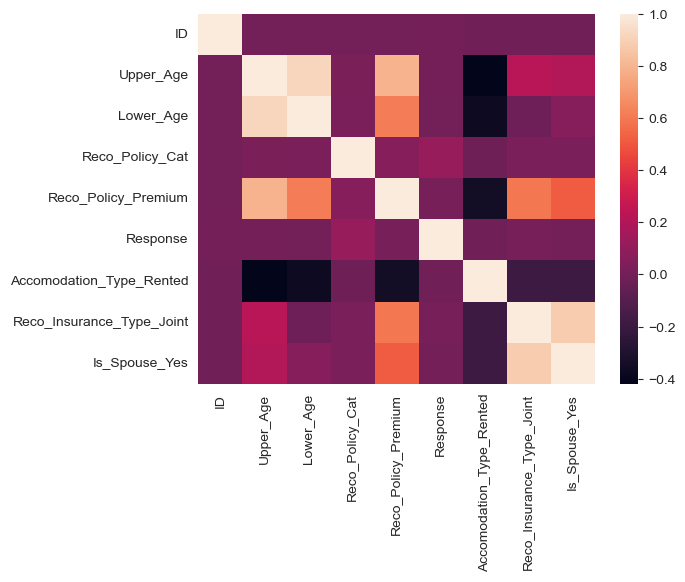

In [51]:
sns.heatmap(insurance.corr());

In [24]:
insurance["Health Indicator"].unique()

array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [29]:
insurance.head()

,ID,City_Code,Region_Code,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes
0,1,C3,3213,36,36,X1,14+,3.0,22,11628.0,0,1,0,0
1,2,C5,1117,75,22,X2,NaN,NaN,22,30510.0,0,0,1,0
2,3,C5,3732,32,32,NaN,1.0,1.0,19,7450.0,1,0,0,0
3,4,C24,4378,52,48,X1,14+,3.0,19,17780.0,0,0,1,0
4,5,C8,2190,44,44,X2,3.0,1.0,16,10404.0,0,1,0,0


## Training
* 20% Testdaten
* `random_state=42` sofern unterstützt
* target feature: `Response`
* Überlege, welche Metrik maximiert werden soll (*accuracy*/*recall*/*f1*) und was die Business Implikation des erhaltenen Modells ist, diese Metrik geht in die `GridSearchCV` als `scoring` ein
* Trainiere mindestens
    * eine optimierte `LogisticRegression` mit `GridSearchCV` (optimiere `solver`, `C` und `class_weight`)
    * einen optimierten `KNeighborsClassifier` mit `GridSearchCV` (optimiere `n_neighbors` und `weights`)
    * zwei ANNs (eins mit `class_weights` und eins ohne).
        `compile(metrics=[<metrik>]` kann entweder ein String übergeben werden oder eine Instanz einer Klasse aus `keras.metrics`

## Evaluiere die Modelle und Interpretiere deine Lösung bezüglich *precision*/*recall*/*f1*